##  <center> DTI 5126: Fundamentals for Applied Data Science </center>
###  <center> Assignment 2 </center>
###  <center> Zeyad Elsayed </center>

## Part A: Decision Trees

> #### Understanding the Dataset

In [92]:
df <- read.csv('hypothyroid.csv') # putting dataset into a frame 
head(df, 5) #looking at the first few rows of the dataset

age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [93]:
nrow(df) #size of dataset
ncol(df)

[1] 3772

[1] 30

#### The dataset contains 3772 records and 30 columns



In [113]:
unique(df[c("Class")])

,Class
1,negative
16,compensated_hypothyroid
41,primary_hypothyroid
1506,secondary_hypothyroid


#### It seems that patients can be diagnosed with 3 different types/levels of hypothyroid: Compensated, Primary, and Secondary 

In [95]:
as.data.frame(table(df[c("Class")]))

Var1,Freq
compensated_hypothyroid,194
negative,3481
primary_hypothyroid,95
secondary_hypothyroid,2


#### Most of the patients do not have hypothyroid. Of the patients that are positive, most of them have compensated hypothyroid. 

*****

In [96]:
library(Hmisc)
df_desc <- describe(df)
df_desc

df 

 30  Variables      3772  Observations
--------------------------------------------------------------------------------
age 
       n  missing distinct 
    3772        0       94 

lowest : 1  10 11 12 13, highest: 91 92 93 94 ? 
--------------------------------------------------------------------------------
sex 
       n  missing distinct 
    3772        0        3 
                            
Value          ?     F     M
Frequency    150  2480  1142
Proportion 0.040 0.657 0.303
--------------------------------------------------------------------------------
on_thyroxine 
       n  missing distinct 
    3772        0        2 
                      
Value          f     t
Frequency   3308   464
Proportion 0.877 0.123
--------------------------------------------------------------------------------
query_on_thyroxine 
       n  missing distinct 
    3772        0        2 
                      
Value          f     t
Frequency   3722    50
Proportion 0.987 0.013
--------------

#### Missing values are represented with '?' therefore, we need to replace '?' with NA

In [97]:
df[df == '?'] <- NA
head(df)

age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NA,SVHC,negative
23,F,f,f,f,f,f,f,f,f,...,t,102,f,NA,f,NA,f,NA,other,negative
46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NA,other,negative
70,F,t,f,f,f,f,f,f,f,...,t,175,f,NA,f,NA,f,NA,other,negative
70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NA,SVI,negative
18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,NA,other,negative


In [98]:
df_desc <- describe(df)
df_desc

df 

 30  Variables      3772  Observations
--------------------------------------------------------------------------------
age 
       n  missing distinct 
    3771        1       93 

lowest : 1  10 11 12 13, highest: 90 91 92 93 94
--------------------------------------------------------------------------------
sex 
       n  missing distinct 
    3622      150        2 
                      
Value          F     M
Frequency   2480  1142
Proportion 0.685 0.315
--------------------------------------------------------------------------------
on_thyroxine 
       n  missing distinct 
    3772        0        2 
                      
Value          f     t
Frequency   3308   464
Proportion 0.877 0.123
--------------------------------------------------------------------------------
query_on_thyroxine 
       n  missing distinct 
    3772        0        2 
                      
Value          f     t
Frequency   3722    50
Proportion 0.987 0.013
--------------------------------------

#### - Age has 1 missing value and 1 illogical value "455" 
#### - Sex has 150 missing values
#### - TSH has 369 missing values
#### - T3 has 769 missing values
#### - TT4 has 231 missing values
#### - T4U has 387 missing values
#### - FTI has 385 missing values
#### - TBG has all missing values therefore this column will be entirely dropped.

-----
-----
###  a. There are some missing values in the dataset. Several strategies can be used to handle them, e.g., remove cases with unknowns. Apply one of these methods to address the missing values

In [99]:
df_dropped = subset(df, select = -c(TBG) ) #drop TBG column
head(df_dropped, 5)

age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,NA,f,NA,f,other,negative
46,M,f,f,f,f,f,f,f,f,...,NA,t,109,t,0.91,t,120,f,other,negative
70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,NA,f,NA,f,other,negative
70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative


#### TBG column was completely dropped due to having all values NA

In [100]:
df_dropped <- df_dropped[!is.na(df_dropped$age), ] #drop the record with age as NA
df_reduced <- subset(df_dropped, age!=455) #drop the record with age = 455
df_reduced$age <- as.numeric(as.character(df_reduced$age))

In [101]:
df_desc <- describe(df_reduced$age)
df_desc

df_reduced$age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3770        0       92        1    51.63    21.78       20       25 
     .25      .50      .75      .90      .95 
      36       54       67       75       79 

lowest :  1  2  4  5  6, highest: 90 91 92 93 94

#### The only missing value in the age column was dropped as well as the record with 455 as age.

In [102]:
df_reduced <- df_reduced[!is.na(df_reduced$sex),]
#df_reduced$sex[is.na(df_reduced$sex)]<-"F"

In [103]:
df_desc <- describe(df_reduced$sex)
df_desc

df_reduced$sex 
       n  missing distinct 
    3620        0        2 
                      
Value          F     M
Frequency   2478  1142
Proportion 0.685 0.315

#### The records with missing value in 'sex' were dropped as well due to the categorical nature of the column.

#### I also tried replacing the NA with the mode of the column which is "F" but this did not affect the feature importance as will be seen below where the column "sex" does not have any significance.

In [104]:
df_reduced$TT4 <- as.numeric(as.character(df_reduced$TT4))
df_reduced$TT4[is.na(df_reduced$TT4)]<-round(mean(df_reduced$TT4, na.rm = TRUE), 0)

df_reduced$TSH <- as.numeric(as.character(df_reduced$TSH))
df_reduced$TSH[is.na(df_reduced$TSH)]<-mean(df_reduced$TSH, na.rm = TRUE)

df_reduced$T3 <- as.numeric(as.character(df_reduced$T3))
df_reduced$T3[is.na(df_reduced$T3)]<-mean(df_reduced$T3, na.rm = TRUE)

df_reduced$T4U <- as.numeric(as.character(df_reduced$T4U))
df_reduced$T4U[is.na(df_reduced$T4U)]<-mean(df_reduced$T4U, na.rm = TRUE)

df_reduced$FTI <- as.numeric(as.character(df_reduced$FTI))
df_reduced$FTI[is.na(df_reduced$FTI)]<-round(mean(df_reduced$FTI, na.rm = TRUE), 0)

In [105]:
head(df_reduced)

age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
41,F,f,f,f,f,f,f,f,f,...,2.500000,t,125,t,1.1400000,t,109,f,SVHC,negative
23,F,f,f,f,f,f,f,f,f,...,2.000000,t,102,f,0.9955284,f,110,f,other,negative
46,M,f,f,f,f,f,f,f,f,...,2.010831,t,109,t,0.9100000,t,120,f,other,negative
70,F,t,f,f,f,f,f,f,f,...,1.900000,t,175,f,0.9955284,f,110,f,other,negative
70,F,f,f,f,f,f,f,f,f,...,1.200000,t,61,t,0.8700000,t,70,f,SVI,negative
18,F,t,f,f,f,f,f,f,f,...,2.010831,t,183,t,1.3000000,t,141,f,other,negative


#### The rest of the columns that contained missing values, the NA was replaced with the mean of the column. This was done since the number of the missing values in each of these columns was relatively large compared to the dataset. So in order not to distort the dataset the records remained with the mean replacing the missing values.

-----
-----
###  b. Perform attributeselection on the datasetand state briefly why attribute selection is sometimes important.

In [106]:
set.seed(7) #set seed to get same results

library(mlbench)
library(caret)
library(caTools)
library(rpart)
library(rpart.plot)
library(dplyr)

model <- rpart(Class ~ ., data = df_reduced, method = "class") #Making a classification model


importance <- varImp(model) #get the importance of features

print(importance)


                             Overall
FTI                       209.202992
FTI_measured                2.983940
T3                         54.257477
T4U                         4.072637
T4U_measured                2.983940
TSH                       366.332137
TSH_measured                3.619749
TT4                       194.437697
on_thyroxine              121.421353
thyroid_surgery            33.704497
age                         0.000000
sex                         0.000000
query_on_thyroxine          0.000000
on_antithyroid_medication   0.000000
sick                        0.000000
pregnant                    0.000000
I131_treatment              0.000000
query_hypothyroid           0.000000
query_hyperthyroid          0.000000
lithium                     0.000000
goitre                      0.000000
tumor                       0.000000
hypopituitary               0.000000
psych                       0.000000
T3_measured                 0.000000
TT4_measured                0.000000
T

#### The features here are shown alongside their importance ant it seems that TSH, FTI, TT4, on_thyroxine, T3, and thyroid_surgery are the most important features.

#### Attribute selection is important because it reduces the number of features that the model trains with that might have little importance and might affect the accuracy of the model as well as the results. Reducing the number of features by selecting only the important ones reduces the training time and migh as well decrease overfitting.

-----
-----
### c. Split the dataset into a train and test set using k-fold cross-validation(k= 10). Create a decision tree model using the selected attributes from your dataset that can predict the type of thyroid disease a patient has.

### d.Visualize and describethe first few splits in the decision tree. Extract some rules

In [111]:
#new data frame with only the important features.
df_model = subset(df_reduced, select = c(TSH, FTI, TT4, on_thyroxine, T3, thyroid_surgery, Class) )
head(df_model)

TSH,FTI,TT4,on_thyroxine,T3,thyroid_surgery,Class
1.30,109,125,f,2.500000,f,negative
4.10,110,102,f,2.000000,f,negative
0.98,120,109,f,2.010831,f,negative
0.16,110,175,t,1.900000,f,negative
0.72,70,61,f,1.200000,f,negative
0.03,141,183,t,2.010831,f,negative


CART 

3620 samples
   6 predictor
   4 classes: 'compensated_hypothyroid', 'negative', 'primary_hypothyroid', 'secondary_hypothyroid' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3258, 3258, 3257, 3259, 3257, 3259, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.9939241  0.9591123
  0.04523810  0.9919912  0.9472879
  0.09047619  0.9919912  0.9472879
  0.13571429  0.9919912  0.9472879
  0.18095238  0.9850828  0.9104686
  0.22619048  0.9776303  0.8655473
  0.27142857  0.9776303  0.8655473
  0.31666667  0.9541503  0.7194206
  0.36190476  0.9541503  0.7194206
  0.40714286  0.9306680  0.2664623

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.


n= 3620 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 3620 280 negative (0.0516574586 0.9226519337 0.0251381215 0.0005524862)  
   2) TSH>=6.05 351 164 compensated_hypothyroid (0.5327635328 0.2079772080 0.2592592593 0.0000000000)  
     4) FTI>=64.5 261  74 compensated_hypothyroid (0.7164750958 0.2605363985 0.0229885057 0.0000000000)  
       8) on_thyroxinet< 0.5 209  22 compensated_hypothyroid (0.8947368421 0.0765550239 0.0287081340 0.0000000000)  
        16) TT4< 149.5 201  14 compensated_hypothyroid (0.9303482587 0.0398009950 0.0298507463 0.0000000000)  
          32) thyroid_surgeryt< 0.5 194   7 compensated_hypothyroid (0.9639175258 0.0051546392 0.0309278351 0.0000000000)  
            64) TT4>=53.5 187   2 compensated_hypothyroid (0.9893048128 0.0000000000 0.0106951872 0.0000000000) *
            65) TT4< 53.5 7   3 primary_hypothyroid (0.2857142857 0.1428571429 0.5714285714 0.0000000000) *
          33) thyroid_surgeryt>=0.5 7   0 negative (0.0

Accuracy,Kappa,Resample
1.0000000,1.0000000,Fold02
0.9944751,0.9632413,Fold01
0.9944904,0.9638050,Fold05
0.9972299,0.9803280,Fold06
0.9944751,0.9626052,Fold10
0.9889197,0.9252472,Fold04
0.9944751,0.9625859,Fold08
0.9944598,0.9620020,Fold09
0.9862259,0.9080640,Fold03
0.9944904,0.9632442,Fold07


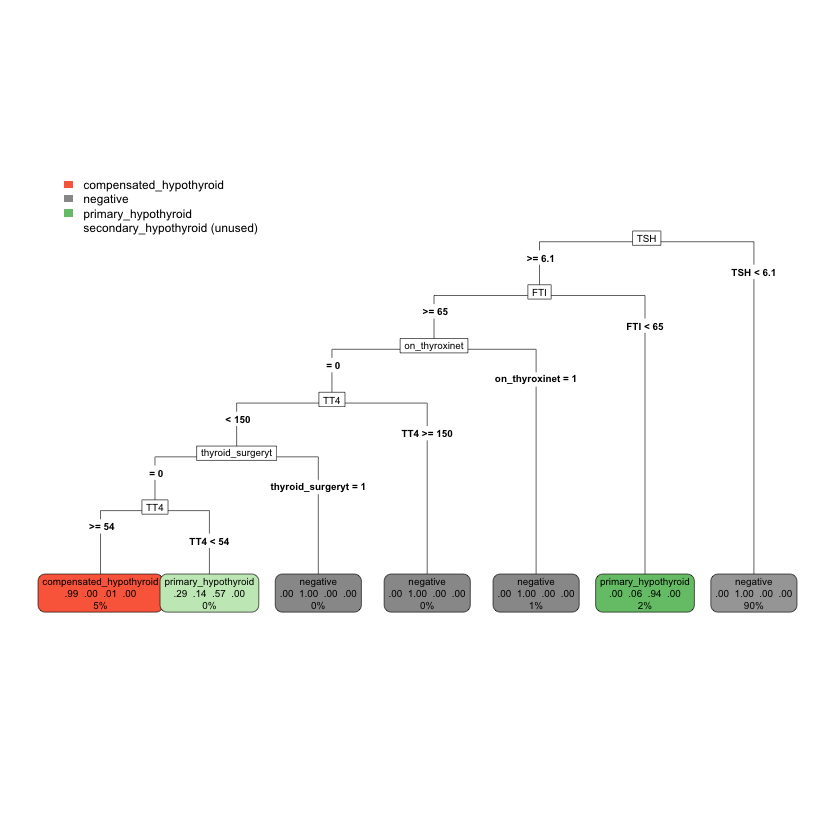

In [112]:
set.seed(123) 


ctrl <- trainControl(method = "cv", number = 10) #cross validation with 10 kfolds

#decision tree using the cv kfolds
dtree_fit_gini <- train(Class~., data = df_model, method = "rpart", parms = list(split = "gini"), trControl = ctrl, tuneLength = 10)
              
print(dtree_fit_gini) #summary of k-fold CV, how the model performed on testing data

dtree_fit_gini$finalModel #final model
#prp(dtree_fit_gini$finalModel, box.palette = "Blues", tweak = 1, type = 0) #display the decision tree
#rpart.plot(dtree_fit_gini$finalModel, tweak = 1.1, type = 5) #display the decision tree
rpart.plot(dtree_fit_gini$finalModel, tweak = 1.1, type = 5, clip.right.labs = FALSE) #display the decision tree

dtree_fit_gini$resample #prediction of each fold


#### After splitting the data into training and testing using 10 kfolds cross validation and running a decision tree model on the selected attributes the previous image visualizes the tree. The first split of the tree is whether TSH>=6.1 if not then the patient is negative, else we check if FTI>=65 if not then the patient is diagnosed with primary hyperthyroid, else we check if on_thyroxine is false if not then the patient is negative if it is true we check if TT4<150 if not then the patient is negative if it is <150 then we check TT4 >=54 if yes then the patient is diagnosed with primary hyperthyroid if not then the patinet is diagnosed with compensated hyperthyroid.

#### General rules:
 - TSH < 6.1 -> negative
 - TSH >=6.1 & FTI < 65 -> primary hyperthyroid
 - TSH >=6.1 & FTI >= 65 & on_thyroxine = true -> negative
 - TSH >=6.1 & FTI >= 65 & on_thyroxine = false & TT4 > 150 -> negative
 - TSH >=6.1 & FTI >= 65 & on_thyroxine = false &   54 <= TT4 < 150 & thyroid_surgery = false -> compensated hyperthyroid
 - TSH >=6.1 & FTI >= 65 & on_thyroxine = false & TT4 < 54 & thyroid_surgery = false -> primary hyperthyroid
 
#### The highest accuracy obtaied was at cp = 0, accuracy = 99.39%. One drawback is that there is no rule to predict the secondary hyperthyroid, which is expected since there are not enough records of patients diagnosed with it, only 2.

-----
-----
### e. Try different ways to improve your decision tree algorithm, e.g., use different splitting strategies, prune tree after splitting.

> #### Increasing the number of kfolds from 10 to 100

CART 

3620 samples
   6 predictor
   4 classes: 'compensated_hypothyroid', 'negative', 'primary_hypothyroid', 'secondary_hypothyroid' 

No pre-processing
Resampling: Cross-Validated (100 fold) 
Summary of sample sizes: 3584, 3583, 3583, 3584, 3583, 3584, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.000000000  0.9936703  0.9623224
  0.004112554  0.9936703  0.9622972
  0.008225108  0.9942259  0.9658439
  0.012337662  0.9942259  0.9658439
  0.016450216  0.9942259  0.9658439
  0.020562771  0.9942259  0.9658439
  0.024675325  0.9942259  0.9658439
  0.028787879  0.9920187  0.9531250
  0.032900433  0.9920187  0.9531250
  0.037012987  0.9920187  0.9531250
  0.041125541  0.9920187  0.9531250
  0.045238095  0.9920187  0.9531250
  0.049350649  0.9920187  0.9531250
  0.053463203  0.9920187  0.9531250
  0.057575758  0.9920187  0.9531250
  0.061688312  0.9920187  0.9531250
  0.065800866  0.9920187  0.9531250
  0.069913420  0.9920187  0.9531250
  0.07402

n= 3620 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 3620 280 negative (0.0516574586 0.9226519337 0.0251381215 0.0005524862)  
   2) TSH>=6.05 351 164 compensated_hypothyroid (0.5327635328 0.2079772080 0.2592592593 0.0000000000)  
     4) FTI>=64.5 261  74 compensated_hypothyroid (0.7164750958 0.2605363985 0.0229885057 0.0000000000)  
       8) on_thyroxinet< 0.5 209  22 compensated_hypothyroid (0.8947368421 0.0765550239 0.0287081340 0.0000000000)  
        16) TT4< 149.5 201  14 compensated_hypothyroid (0.9303482587 0.0398009950 0.0298507463 0.0000000000)  
          32) thyroid_surgeryt< 0.5 194   7 compensated_hypothyroid (0.9639175258 0.0051546392 0.0309278351 0.0000000000) *
          33) thyroid_surgeryt>=0.5 7   0 negative (0.0000000000 1.0000000000 0.0000000000 0.0000000000) *
        17) TT4>=149.5 8   0 negative (0.0000000000 1.0000000000 0.0000000000 0.0000000000) *
       9) on_thyroxinet>=0.5 52   0 negative (0.0000000000 1.0000000000 0.00

Accuracy,Kappa,Resample
1.0000000,1.0000000,Fold021
1.0000000,1.0000000,Fold065
1.0000000,1.0000000,Fold054
1.0000000,1.0000000,Fold032
1.0000000,1.0000000,Fold010
1.0000000,1.0000000,Fold043
0.9722222,0.8461538,Fold099
1.0000000,1.0000000,Fold016
1.0000000,1.0000000,Fold087
1.0000000,1.0000000,Fold076


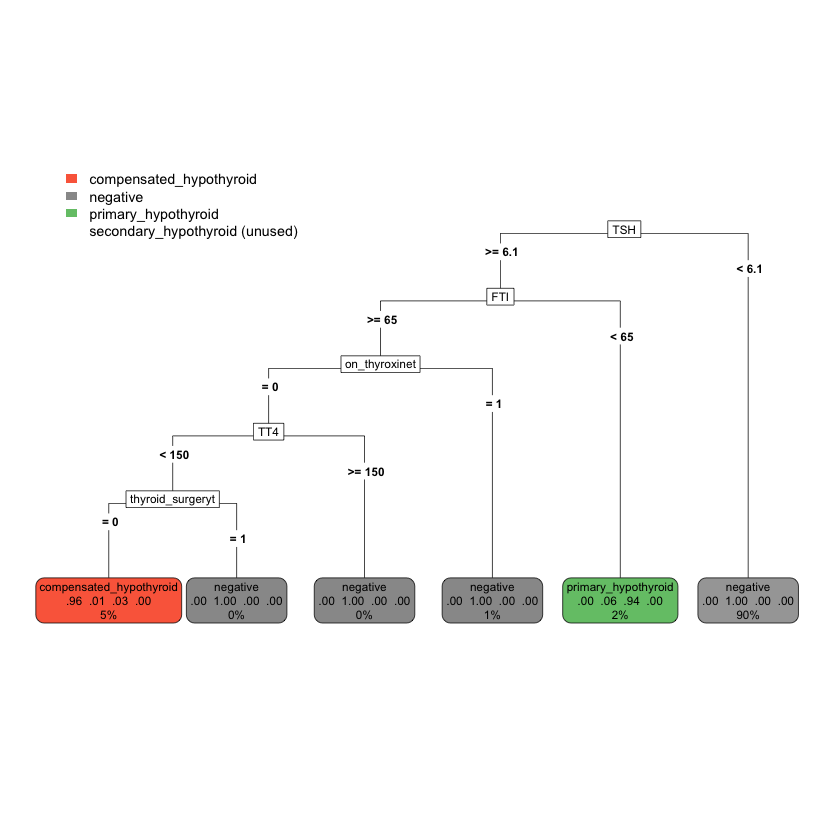

In [18]:
set.seed(123) # using same seed to be able to compare the results two models.

ctrl <- trainControl(method = "cv", number = 100) #cross validation with 10 kfolds

#decision tree using the cv kfolds
dtree_fit_gini <- train(Class~., data = df_model, method = "rpart", parms = list(split = "gini"), trControl = ctrl, tuneLength = 100)
              
print(dtree_fit_gini) #summary of k-fold CV, how the model performed on testing data

dtree_fit_gini$finalModel #final model
rpart.plot(dtree_fit_gini$finalModel, tweak = 1.1, type = 5) #display the decision tree


dtree_fit_gini$resample #prediction of each fold


#### The decision tree here uses 100 kfolds rather than 10 this means that the data was splitted much more and more combinations of testing and training data were used. The model did improve and the best accuracy was at cp = 0.024675325, accuracy = 99.42% vs the 99.39% old accuracy. The improvement can also be seen in the visualization of the model where the rule of TT4 < 54 -> primary_hyperthyroid was completely removed since it had 0% chance.
---
---

> #### Split data into testing and training 75%, 25% and prune tree.

[1] 2717    7

[1] 903   7

n= 2717 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2717 212 negative (0.0518954729 0.9219727641 0.0253956570 0.0007361060)  
   2) TSH>=6.05 263 122 compensated_hypothyroid (0.5361216730 0.2015209125 0.2623574144 0.0000000000)  
     4) FTI>=64.5 195  54 compensated_hypothyroid (0.7230769231 0.2564102564 0.0205128205 0.0000000000)  
       8) on_thyroxine=f 156  15 compensated_hypothyroid (0.9038461538 0.0705128205 0.0256410256 0.0000000000)  
        16) TT4< 145 149  10 compensated_hypothyroid (0.9328859060 0.0402684564 0.0268456376 0.0000000000) *
        17) TT4>=145 7   2 negative (0.2857142857 0.7142857143 0.0000000000 0.0000000000) *
       9) on_thyroxine=t 39   0 negative (0.0000000000 1.0000000000 0.0000000000 0.0000000000) *
     5) FTI< 64.5 68   3 primary_hypothyroid (0.0000000000 0.0441176471 0.9558823529 0.0000000000) *
   3) TSH< 6.05 2454   2 negative (0.0000000000 0.9991850041 0.0000000000 0.0008149959) *

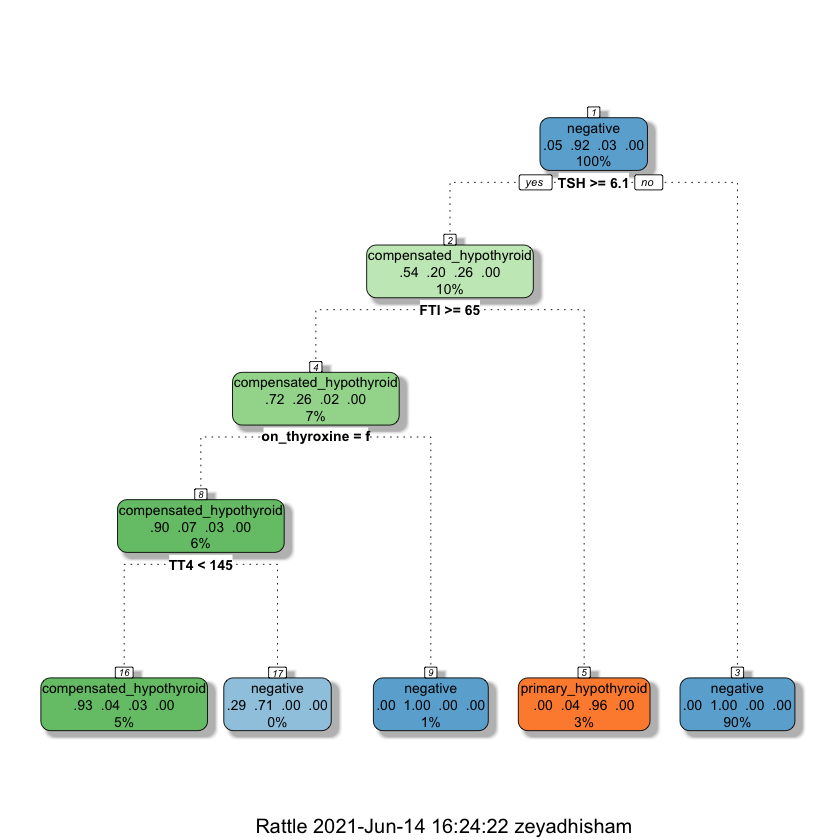

In [163]:
library(rattle)
library(RColorBrewer)

set.seed(80) 
intr <- createDataPartition(y = df_model$Class, p= 0.75, list = FALSE) #split 0.75 testing and 0.25 training
tr <- df_model[intr,]
tes <- df_model[-intr,]

dim(tr)
dim(tes)

#decision tree model
mtree <- rpart(Class~., data = tr, method="class", control = rpart.control(minsplit = 20, minbucket = 7, maxdepth = 10, usesurrogate = 2, xval =10 ))

mtree #tree

fancyRpartPlot(mtree) #tree plot


#### The following is the decision tree when the data was splitted into training and testing with a percentage of 75% training and 25% testing.

In [167]:
tree_pr = predict(mtree, tes, type = "class")
table(tree_pr, tes$Class)

                         
tree_pr                   compensated_hypothyroid negative primary_hypothyroid
  compensated_hypothyroid                      46        2                   2
  negative                                      0      831                   0
  primary_hypothyroid                           0        2                  20
  secondary_hypothyroid                         0        0                   0
                         
tree_pr                   secondary_hypothyroid
  compensated_hypothyroid                     0
  negative                                    0
  primary_hypothyroid                         0
  secondary_hypothyroid                       0

#### The following is the confusion matrix of the tree. Out of 903 records in the testing dataset 897 were correctly classified with an accuracy of 99.33% (897/903)

In [146]:
printcp(mtree) 
bestcp <- mtree$cptable[which.min(mtree$cptable[,"xerror"]),"CP"] #getting the best cp


Classification tree:
rpart(formula = Class ~ ., data = tr, method = "class", control = rpart.control(minsplit = 20, 
    minbucket = 7, maxdepth = 10, usesurrogate = 2, xval = 10))

Variables actually used in tree construction:
[1] FTI          TSH          TT4          on_thyroxine

Root node error: 212/2717 = 0.078027

n= 2717 

        CP nsplit rel error  xerror     xstd
1 0.415094      0  1.000000 1.00000 0.065946
2 0.306604      1  0.584906 0.58491 0.051313
3 0.183962      2  0.278302 0.27830 0.035836
4 0.014151      3  0.094340 0.09434 0.021017
5 0.010000      4  0.080189 0.09434 0.021017


#### We got the best cp to prune the tree.

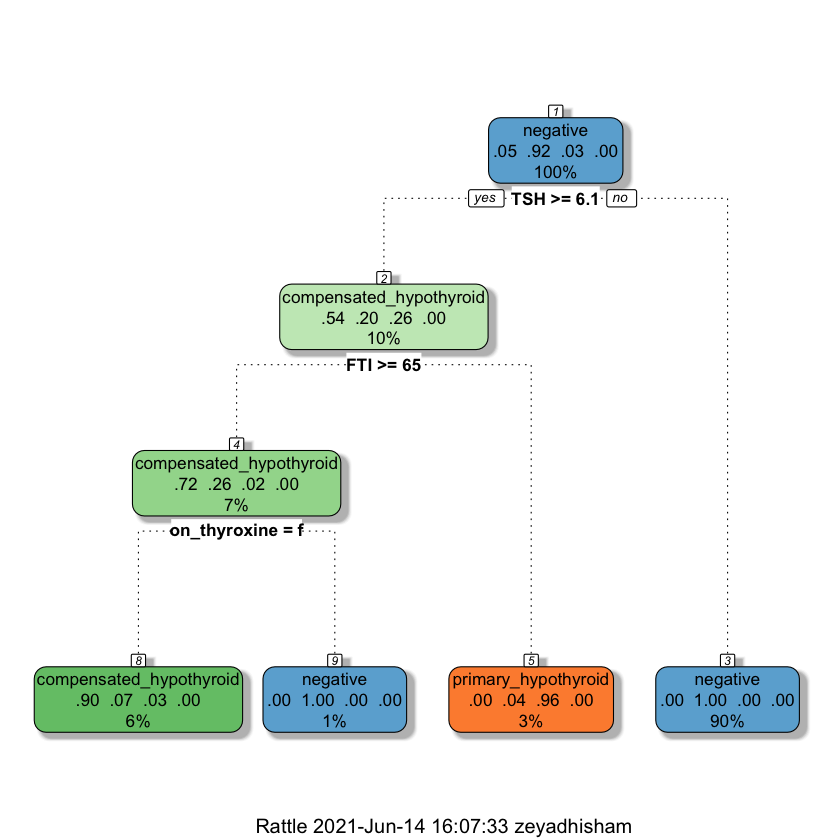

In [148]:
pruned <- prune(mtree, cp = bestcp)
fancyRpartPlot(pruned)

#### This is the new tree after pruning. As seen the level of the tree decreased by removing the last level. 

In [162]:
tree_pred = predict(pruned, tes, type = "class")
table(tree_pred, tes$Class)

                         
tree_pred                 compensated_hypothyroid negative primary_hypothyroid
  compensated_hypothyroid                      46        5                   2
  negative                                      0      828                   0
  primary_hypothyroid                           0        2                  20
  secondary_hypothyroid                         0        0                   0
                         
tree_pred                 secondary_hypothyroid
  compensated_hypothyroid                     0
  negative                                    0
  primary_hypothyroid                         0
  secondary_hypothyroid                       0

#### The following is the confusion matrix after the pruned model was used to predict the class of the testing data. The accuracy of the tree after pruning is 99% (894/903). The accuracy decreased which means that the level that was pruned or removed affected the labels.

## Part B Support Vector Machines: 
>Understanding the data

In [19]:
df_dia <- read.csv('diabetes.csv') # putting dataset into a frame 
head(df_dia, 7) #looking at the first few rows of the dataset
nrow(df_dia) #size of dataset
ncol(df_dia)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,?,33.6,0.627,50,1
1,85,66,29,?,26.6,0.351,31,0
8,183,64,?,?,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,?,?,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1


[1] 768

[1] 9

In [20]:
library(dplyr)
df_dia <- mutate_all(df_dia, function(x) as.numeric(as.character(x))) #convert df_dia to numeric
                  
df_dia[df_dia == '?'] <- NA #convert '?' to NA
df_desc <- describe(df_dia) #understand the data and check missing values in each column
df_desc

Warning message in (function (x) :
“NAs introduced by coercion”Warning message in (function (x) :
“NAs introduced by coercion”Warning message in (function (x) :
“NAs introduced by coercion”Warning message in (function (x) :
“NAs introduced by coercion”Warning message in (function (x) :
“NAs introduced by coercion”

df_dia 

 9  Variables      768  Observations
--------------------------------------------------------------------------------
Pregnancies 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     768        0       17    0.986    3.845    3.698        0        0 
     .25      .50      .75      .90      .95 
       1        3        6        9       10 
                                                                            
Value          0     1     2     3     4     5     6     7     8     9    10
Frequency    111   135   103    75    68    57    50    45    38    28    24
Proportion 0.145 0.176 0.134 0.098 0.089 0.074 0.065 0.059 0.049 0.036 0.031
                                              
Value         11    12    13    14    15    17
Frequency     11     9    10     2     1     1
Proportion 0.014 0.012 0.013 0.003 0.001 0.001
--------------------------------------------------------------------------------
Glucose 
       n  missing distinct     Info 

key,value
Pregnancies,6
Pregnancies,1
Pregnancies,8
Pregnancies,1
Pregnancies,0
Pregnancies,5


Warning message:
“Removed 648 rows containing non-finite values (stat_bin).”

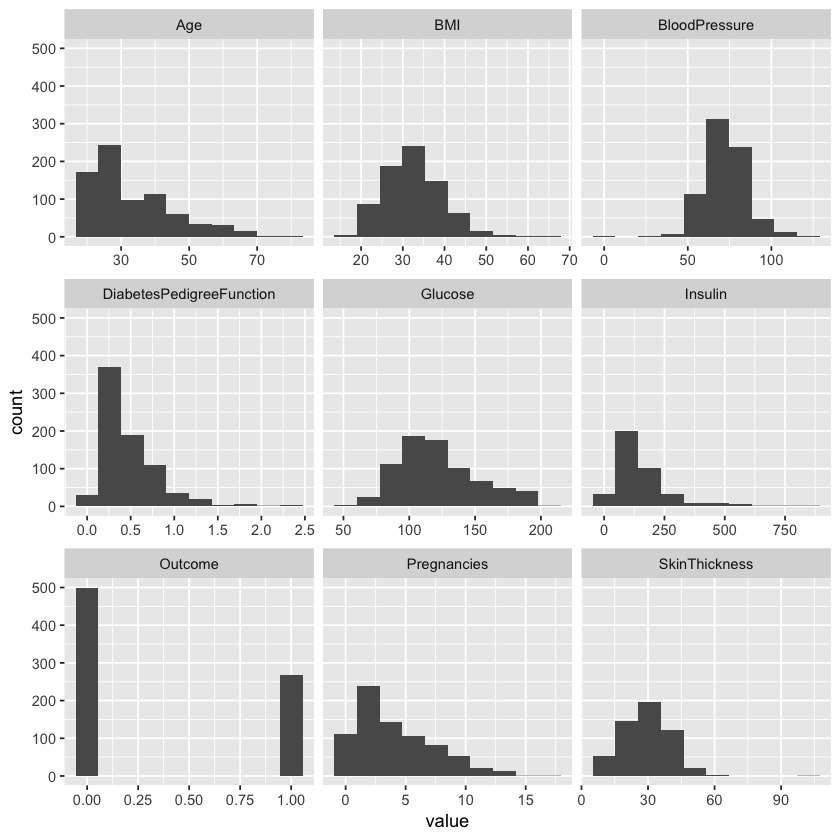

In [22]:
library(tidyr)
library(ggplot2)

df_dia %>% gather() %>% head()

ggplot(gather(df_dia), aes(value)) + #plot all columns to visualize them
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')

### a. Some data points are not available, handle the missing data by applying central measure of tendency to derive the missing value.

In [23]:
df_dia$Glucose[is.na(df_dia$Glucose)]<-round(mean(df_dia$Glucose, na.rm = TRUE), digits=0)

df_dia$BloodPressure[is.na(df_dia$BloodPressure)]<-round(mean(df_dia$BloodPressure, na.rm = TRUE), digits=0)

df_dia$SkinThickness[is.na(df_dia$SkinThickness)]<-round(mean(df_dia$SkinThickness, na.rm = TRUE), digits=0)

df_dia$Insulin[is.na(df_dia$Insulin)]<-round(mean(df_dia$Insulin, na.rm = TRUE), digits=0)

df_dia$BMI[is.na(df_dia$BMI)]<-mean(df_dia$BMI, na.rm = TRUE)

head(df_dia)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,154,33.6,0.627,50,1
1,85,66,29,154,26.6,0.351,31,0
8,183,64,29,154,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,29,154,25.6,0.201,30,0


#### Based on the histograms of the columns the central measure of tendancy used to derive the missing values was the mean. All columns means were rounded except for the BMI in order to keep the data as the original dataset were the columns contain integers.

### b. Partition the dataset into a train dataset (75%) and test dataset (25%). Use the train dataset to build the Neural Network and the test dataset to evaluate how well the model generalizes to future results.

In [24]:
set.seed(80) 
intrain <- createDataPartition(y = df_dia$Outcome, p= 0.75, list = FALSE)
training <- df_dia[intrain,]
testing <- df_dia[-intrain,]

In [25]:
dim(training); dim(testing);

[1] 576   9

[1] 192   9

#### The data was splitted into training data that contains 75% of the original data and testing which is 25%.

### c. Neural networks work best when the input data are scaled to a narrow range around zero. Rescale the data with a normalizing(e.g., min_max normalization)or standardization (e.g., z_score standardization) function.

In [26]:
max = apply(df_dia , 2 , max) #rescaling the data using min_max normalization
min = apply(df_dia, 2 , min)
scaled = as.data.frame(scale(df_dia, center = min, scale = max - min))

In [27]:
set.seed(80) 
intrain <- createDataPartition(y = scaled$Outcome, p= 0.75, list = FALSE)
trainNN <- scaled[intrain,]
testNN <- scaled[-intrain,]
dim(trainNN); dim(testNN);

[1] 576   9

[1] 192   9

In [114]:
head(scaled)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.35294118,0.6709677,0.5901639,0.3043478,0.1820331,0.3149284,0.23441503,0.4833333,1
0.05882353,0.2645161,0.5409836,0.2391304,0.1820331,0.1717791,0.11656704,0.1666667,0
0.47058824,0.8967742,0.5245902,0.2391304,0.1820331,0.1042945,0.25362938,0.1833333,1
0.05882353,0.2903226,0.5409836,0.1739130,0.1111111,0.2024540,0.03800171,0.0000000,0
0.00000000,0.6000000,0.3278689,0.3043478,0.1985816,0.5092025,0.94363792,0.2000000,1
0.29411765,0.4645161,0.6065574,0.2391304,0.1820331,0.1513292,0.05251921,0.1500000,0


#### In the new dataframe, the values of all columns were scaled between 0,1 using the min max normalization as seen in the above table. Also a new split between testing and training was made again this time on the scaled data

### d. Train& plot a simple Neural Network with only 2 hidden nodes(not layer). Then, train & plot a multilayer perceptron with 2 layers & 5 nodes. What impact does the change in the number of layers & nodes have on the accuracy of your model?

> #### Neural network with 2 hidden nodes

In [56]:
library(neuralnet)

NN = neuralnet(Outcome ~ Pregnancies + Glucose+ BloodPressure + SkinThickness + 
               Insulin + BMI + DiabetesPedigreeFunction + Age , trainNN, hidden = 2 , linear.output = T )

# plot neural network
plot(NN)
#NN$result.matrix


<img src="Rplot 4.png">

#### The following is the output of training a simple Neural Network with only 2 hidden nodes.

In [57]:
predict_testNN = compute(NN, testNN[,c(1:8)]) #predict on testing data

results_NN <- data.frame(actual = testNN$Outcome, prediction = predict_testNN$net.result) #get the results actual vs predicted
#results

roundedresults_NN<-sapply(results_NN,round,digits=0) #generate confusion matrix.
roundedresultsdf_NN=data.frame(roundedresults_NN)

table(roundedresultsdf_NN$actual,roundedresultsdf_NN$prediction)

   
      0   1
  0 107  24
  1  22  39

#### The confusion matrix shows that the model was able to determine whether the patient has diabetes or not with an accuracy of 76% (146/192) as seen from the confusion matrix

> #### Multilayer perceptron with 2 layers & 5 nodes

In [128]:
nn = neuralnet(Outcome ~ Pregnancies + Glucose+ BloodPressure + SkinThickness + 
               Insulin + BMI + DiabetesPedigreeFunction + Age , trainNN, hidden=c(5,5) ,
               linear.output = T, stepmax = 10e+09 )

# plot neural network
plot(nn)

<img src="nn plot 3.png">

#### The following is the multilayer perceptron with 2 hidden layers & 5 nodes in each layer

In [129]:
predict_testnn = compute(nn, testNN[,c(1:8)]) #predict on testing data

results_nn <- data.frame(actual = testNN$Outcome, prediction = predict_testnn$net.result) #get the results actual vs predicted
#results

roundedresults_nn<-sapply(results_nn,round,digits=0) #generate confusion matrix.
roundedresultsdf_nn=data.frame(roundedresults_nn)

table(roundedresultsdf_nn$actual,roundedresultsdf_nn$prediction)

   
     0  1
  0 97 34
  1 20 41

#### The accuracy decrease to 71.87% (138/192). This indicates that adding the number of hidden layers and nodes does not necessarily improve the performance of the model. Maybe now the model became too complex and the data doesn not require this level of complexity. Therefore the performance decreased. This is an example of overfitting.

---
### e. Try changing the activation function, varying the learning rate, epochs or removing the bias. What effects does any of thesehave on the result?

> #### Changing Learning Rate:

In [84]:
n = neuralnet(Outcome ~ Pregnancies + Glucose+ BloodPressure + SkinThickness + 
               Insulin + BMI + DiabetesPedigreeFunction + Age , trainNN, hidden=c(3,2) , linear.output = T,
               learningrate = 0.1, stepmax = 10e+05 )


In [85]:
predict_testn = compute(n, testNN[,c(1:8)]) #predict on testing data

results_n <- data.frame(actual = testNN$Outcome, prediction = predict_testn$net.result) #get the results actual vs predicted
#results

roundedresults_n<-sapply(results_n,round,digits=0) #generate confusion matrix.
roundedresultsdf_n=data.frame(roundedresults_n)

table(roundedresultsdf_n$actual,roundedresultsdf_n$prediction)

   
      0   1
  0 105  26
  1  14  47

#### Changing the learning rate increased the accuracy to 79.16% (152/192)

> #### Changing the activation function:

In [90]:
softplus <- function(x) log(1 + exp(x)) 

nf = neuralnet(Outcome ~ Pregnancies + Glucose+ BloodPressure + SkinThickness + 
               Insulin + BMI + DiabetesPedigreeFunction + Age , trainNN, hidden=c(3,2) , linear.output = T,
               act.fct = softplus )

In [91]:
predict_testnf = compute(nf, testNN[,c(1:8)]) #predict on testing data

results_nf <- data.frame(actual = testNN$Outcome, prediction = predict_testnf$net.result) #get the results actual vs predicted
#results

roundedresults_nf<-sapply(results_nf,round,digits=0) #generate confusion matrix.
roundedresultsdf_nf=data.frame(roundedresults_nf)

table(roundedresultsdf_nf$actual,roundedresultsdf_nf$prediction)

   
      0   1
  0 116  15
  1  24  37

#### Changing the activation function also increased the accuracy to 79.68% (153/192)